In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [68]:
# Carregue os datasets
demogra = pd.read_csv("..\data\Demographics.csv")
accounts = pd.read_csv("..\data\Accounts.csv")
loans = pd.read_csv("..\data\loans.csv")
type(accounts)

pandas.core.frame.DataFrame

In [ ]:
loans.info()

In [ ]:
loans.describe()

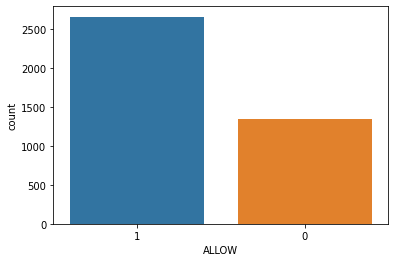

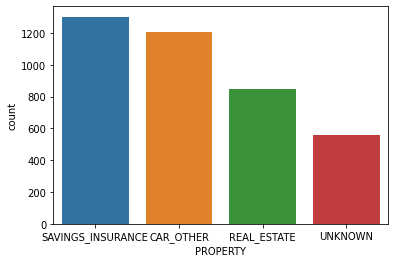

In [6]:
risk_plot = sns.countplot(data=loans, x='ALLOW', order=loans['ALLOW'].value_counts().index)
plt.show()
risk_plot = sns.countplot(data=demogra, x='PROPERTY', order=demogra['PROPERTY'].value_counts().index)
plt.show()

In [7]:
# Fazer join entre O Loans e Demographics
lo_de = loans.merge(demogra)

In [ ]:
lo_de_ac = lo_de.merge(accounts, on='ID', how='left')
lo_de_ac.info()

In [ ]:
list(lo_de_ac)

In [ ]:
# Checa a quantidade de aprovacoes para o NO_CHECKING
len(lo_de_ac.loc[(lo_de_ac['CHECKING_BALANCE'] == 'NO_CHECKING') & (lo_de_ac['ALLOW'] == 0)])

<AxesSubplot:xlabel='CHECKING_BALANCE', ylabel='Count'>

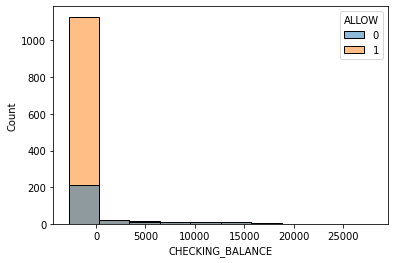

In [29]:
# Verificar o checking_balance
temp1 = lo_de_ac.loc[(lo_de_ac['CHECKING_BALANCE'] != 'NO_CHECKING')]
mylist = temp1[['CHECKING_BALANCE','ALLOW']].dropna()
# s = mylist.select_dtypes(include='object').columns
# mylist[s] = mylist[s].astype("float")
mylist['CHECKING_BALANCE'] = mylist['CHECKING_BALANCE'].astype("float")
sns.histplot(data=mylist, x='CHECKING_BALANCE', hue='ALLOW', bins=10)

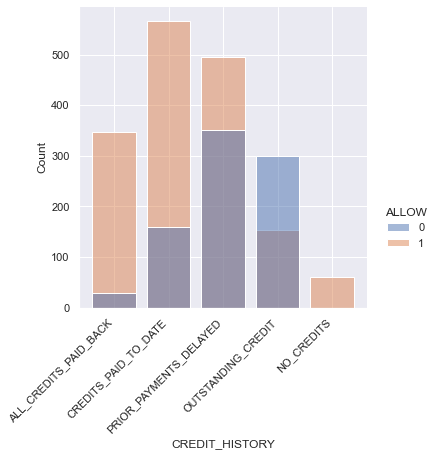

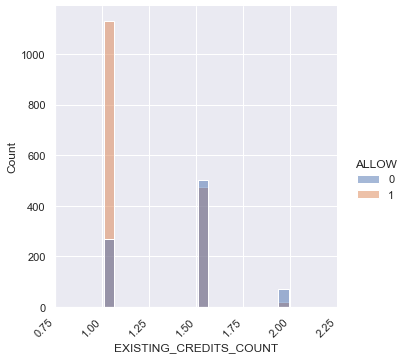

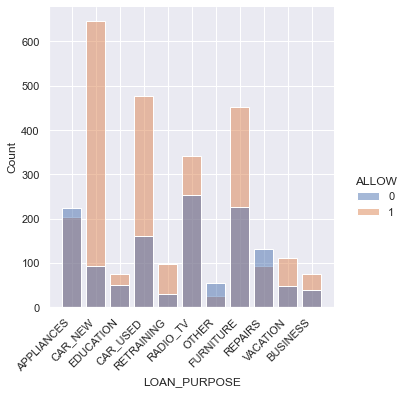

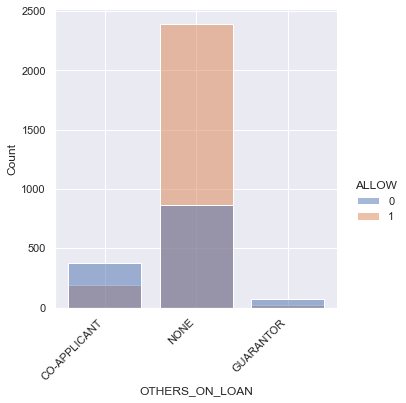

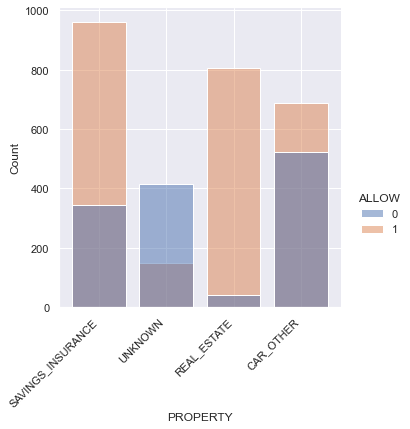

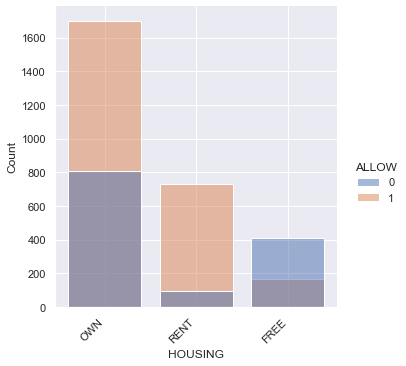

In [70]:
# https://drawingfromdata.com/seaborn/matplotlib/visualization/rotate-axis-labels-matplotlib-seaborn.html
sns.set_theme(); 
# Accounts ------------------
chart = sns.displot(lo_de_ac, x="CREDIT_HISTORY",shrink=.8, hue="ALLOW")
chart.set_xticklabels(horizontalalignment='right', rotation=45)
# plt.show
# trabalhar esse depois
# chart = sns.displot(lo_de_ac, x="EXISTING_SAVINGS",shrink=.8, hue="ALLOW")
# chart.set_xticklabels(horizontalalignment='right', rotation=45)
# plt.show
chart = sns.displot(lo_de_ac, x="EXISTING_CREDITS_COUNT",shrink=.8, hue="ALLOW")
chart.set_xticklabels(horizontalalignment='right', rotation=45)
# plt.show
# chart = sns.displot(lo_de_ac, x="EXISTING_SAVINGS",shrink=.8, hue="ALLOW")
# chart.set_xticklabels(horizontalalignment='right', rotation=45)
# plt.show
# Loans ----------------------
chart = sns.displot(lo_de_ac, x="LOAN_PURPOSE",shrink=.8, hue="ALLOW")
chart.set_xticklabels(horizontalalignment='right', rotation=45)
# plt.show
chart = sns.displot(lo_de_ac, x="OTHERS_ON_LOAN",shrink=.8, hue="ALLOW")
chart.set_xticklabels(horizontalalignment='right', rotation=45)
# plt.show()
chart = sns.displot(lo_de_ac, x="PROPERTY",shrink=.8, hue="ALLOW")
chart.set_xticklabels(horizontalalignment='right', rotation=45)
# plt.show
chart = sns.displot(lo_de_ac, x="HOUSING",shrink=.8, hue="ALLOW")
chart.set_xticklabels(horizontalalignment='right', rotation=45)
# Outros


In [33]:
lo_de_ac_clean = lo_de_ac.dropna()

In [56]:
features = ['PAYMENT_TERM','INSTALLMENT_PERCENT','LOAN_PURPOSE','LOAN_AMOUNT','OTHERS_ON_LOAN','AGE','DEPENDENTS','TELEPHONE','EMPLOYMENT_DURATION',
'PROPERTY','HOUSING','CURRENT_RESIDENCE_DURATION','CREDIT_HISTORY','EXISTING_CREDITS_COUNT']
target = ['ALLOW']

X = lo_de_ac_clean[features].copy()
y = lo_de_ac_clean[target].copy()

In [43]:
len(X)

2237

In [65]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

In [57]:
le = LabelEncoder()
# le_LOAN_PURPOSE = LabelEncoder()
# le_OTHERS_ON_LOAN = LabelEncoder()
# le_PROPERTY = LabelEncoder()
# le_HOUSING = LabelEncoder()
# le_CREDIT_HISTORY = LabelEncoder()
# le_CHECKING_BALANCE = LabelEncoder()

In [60]:
X['LOAN_PURPOSE_n'] = le.fit_transform(X['LOAN_PURPOSE'])
X['OTHERS_ON_LOAN_n'] = le.fit_transform(X['OTHERS_ON_LOAN'])
X['PROPERTY_n'] = le.fit_transform(X['PROPERTY'])
X['HOUSING_n'] = le.fit_transform(X['HOUSING'])
X['CREDIT_HISTORY_n'] = le.fit_transform(X['CREDIT_HISTORY'])
X_n = X.drop(['LOAN_PURPOSE','OTHERS_ON_LOAN','PROPERTY','HOUSING','CREDIT_HISTORY'],axis='columns')

In [61]:
X_n

,PAYMENT_TERM,INSTALLMENT_PERCENT,LOAN_AMOUNT,AGE,DEPENDENTS,TELEPHONE,EMPLOYMENT_DURATION,CURRENT_RESIDENCE_DURATION,EXISTING_CREDITS_COUNT,LOAN_PURPOSE_n,OTHERS_ON_LOAN_n,PROPERTY_n,HOUSING_n,CREDIT_HISTORY_n
1459,310.0,2.0,3503.0,24.0,1.0,1.0,0.0,2.0,1.0,2,2,2,1,0
1460,630.0,3.0,3729.0,30.0,1.0,0.0,5.0,1.0,1.0,2,2,0,2,1
1461,868.0,3.0,8516.0,40.0,1.0,0.0,4.0,4.0,2.0,3,2,3,1,1
1462,403.0,3.0,2577.0,28.0,1.0,0.0,0.0,3.0,2.0,5,2,0,1,4
1463,810.0,4.0,3750.0,19.0,1.0,0.0,3.0,3.0,1.0,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3931,450.0,3.0,3007.0,41.0,1.0,0.0,7.0,3.0,1.0,2,0,0,1,1
3932,510.0,4.0,4191.0,46.0,1.0,1.0,11.0,3.0,1.0,10,1,2,1,4
3933,124.0,1.0,250.0,28.0,1.0,1.0,7.0,1.0,2.0,5,2,0,2,4
3934,961.0,3.0,5172.0,46.0,1.0,0.0,7.0,3.0,1.0,1,2,0,2,4


In [63]:
test_pct = 0.3 # Separaremos 30% dos dados para testes
X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size=test_pct)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo (número de predições assertivas sobre número total de testes): {acc}")

Acurácia do modelo (número de predições assertivas sobre número total de testes): 0.6830357142857143


In [ ]:
plt.figure(figsize=(15,7.5))
plot_tree(model, filled=True, rounded=True, class_names=["No HD","Yes HD"], feature_names=X.columns)

In [ ]:
plot_confusion_matrix(model, X_test, y_test, display_labels=["No Allow", "Allow"])